<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n250.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,37.449527,258.098949,213.296430,44.802519
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-580.789134,-340.956728,212.705283,-553.662012
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-46.372513,189.762776,267.686056,-77.923279
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-107.081213,150.402308,224.832433,-74.430126
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,73.727149,342.511916,259.209248,83.302668
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-81.605534,120.982874,201.121228,-80.138354
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,336.403702,602.825244,306.830854,295.994390
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-100.461366,228.614799,346.042603,-117.427804
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-166.337399,128.034656,281.822971,-153.788315


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,37.449527,258.098949,213.296430,44.802519
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-580.789134,-340.956728,212.705283,-553.662012
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-46.372513,189.762776,267.686056,-77.923279
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-107.081213,150.402308,224.832433,-74.430126
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,73.727149,342.511916,259.209248,83.302668
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-81.605534,120.982874,201.121228,-80.138354
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,336.403702,602.825244,306.830854,295.994390
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-100.461366,228.614799,346.042603,-117.427804
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-166.337399,128.034656,281.822971,-153.788315


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,37.449527,258.098949,213.296430,44.802519
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-580.789134,-340.956728,212.705283,-553.662012
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-46.372513,189.762776,267.686056,-77.923279
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-107.081213,150.402308,224.832433,-74.430126
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,73.727149,342.511916,259.209248,83.302668
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-81.605534,120.982874,201.121228,-80.138354
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,336.403702,602.825244,306.830854,295.994390
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-100.461366,228.614799,346.042603,-117.427804
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-166.337399,128.034656,281.822971,-153.788315


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

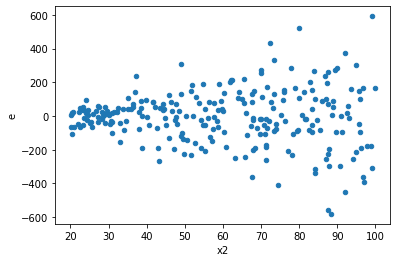

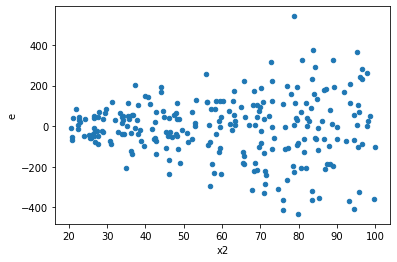

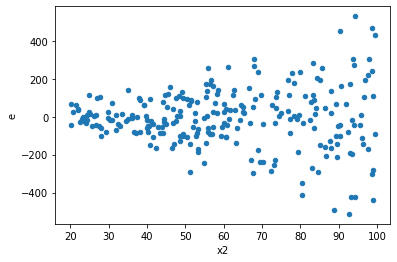

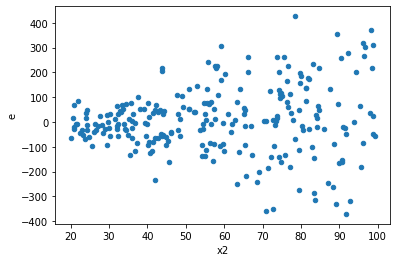

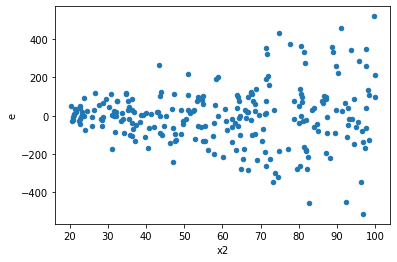

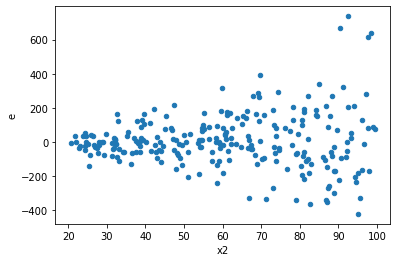

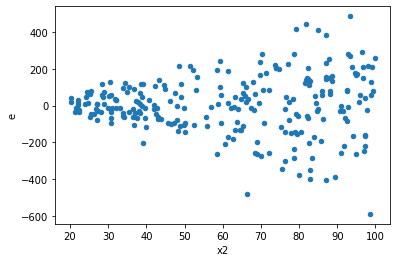

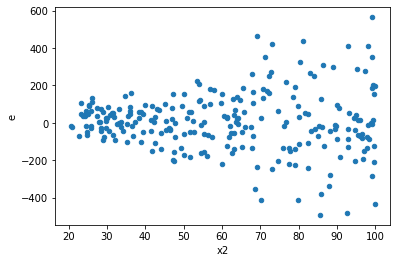

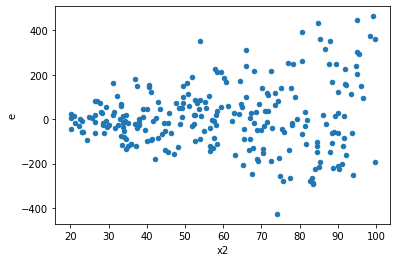

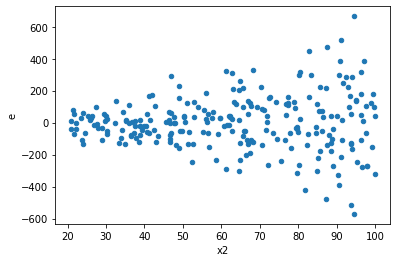

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,1361210.3601887396,3195490.9158983775,14179.27458529937,33286.363707274766,2.347536434747165,3.9717540047945477e-05,0.999980141229976,1.9858770023972738e-05,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,1529094.657785938,3220261.1614429243,15928.069351936852,33544.3870983638,2.1059920293657437,0.0003200339703386401,0.9998399830148307,0.00016001698516932006,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,1314473.365938882,3376785.781668877,13692.430895196689,35174.85189238414,2.568926742199115,5.930298394352107e-06,0.9999970348508028,2.9651491971760535e-06,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,689194.5586110383,2945966.8742943746,7179.109985531649,30687.1549405664,4.27450686817885,9.159117908552616e-12,0.9999999999954204,4.579558954276308e-12,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,1268575.2397051603,3328048.253715725,13214.32541359542,34667.169309538804,2.623453579694038,3.7257777365518052e-06,0.9999981371111317,1.8628888682759026e-06,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,1239005.8022680762,3550140.9214207474,12906.31044029246,36980.63459813278,2.8653142018560334,4.852394925869419e-07,0.9999997573802537,2.4261974629347094e-07,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,1141027.3110606887,3788210.498637396,11885.701156882174,39460.52602747287,3.3199998474321437,1.1923581011430429e-08,0.9999999940382095,5.961790505715214e-09,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,1579135.2859587672,3705147.108798808,16449.325895403825,38595.28238332092,2.346313923666926,4.013874868258327e-05,0.9999799306256587,2.0069374341291635e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,1088279.609009358,3035082.595345974,11336.245927180813,31615.443701520562,2.7888812491017423,9.199774508861225e-07,0.9999995400112746,4.5998872544306124e-07,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,1361210.3601887396,3195490.9158983775,14179.27458529937,33286.363707274766,2.347536434747165,3.9717540047945477e-05,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,1529094.657785938,3220261.1614429243,15928.069351936852,33544.3870983638,2.1059920293657437,0.0003200339703386401,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,1314473.365938882,3376785.781668877,13692.430895196689,35174.85189238414,2.568926742199115,5.930298394352107e-06,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,689194.5586110383,2945966.8742943746,7179.109985531649,30687.1549405664,4.27450686817885,9.159117908552616e-12,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,1268575.2397051603,3328048.253715725,13214.32541359542,34667.169309538804,2.623453579694038,3.7257777365518052e-06,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,1239005.8022680762,3550140.9214207474,12906.31044029246,36980.63459813278,2.8653142018560334,4.852394925869419e-07,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,1141027.3110606887,3788210.498637396,11885.701156882174,39460.52602747287,3.3199998474321437,1.1923581011430429e-08,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,1579135.2859587672,3705147.108798808,16449.325895403825,38595.28238332092,2.346313923666926,4.013874868258327e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,1088279.609009358,3035082.595345974,11336.245927180813,31615.443701520562,2.7888812491017423,9.199774508861225e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    706
Reject001=1 : Homoscedasticity      294
Name: Result_test, dtype: int64